In [2]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import unique
from pandas import read_csv
import seaborn
seaborn.set(style='ticks')
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/dataset_stroke_tubes
!ls

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1d8ZxXOduBHPK204vQkrY2j0qbnQTXGye/dataset_stroke_tubes
 data_py			     'TUBES DASILDAT.ipynb'
 dataset_med.csv		      updated_pollution_dataset.csv
 healthcare-dataset-stroke-data.csv   waterQuality1.csv


In [3]:
# load the dataset
df = pd.read_csv('/content/drive/My Drive/dataset_stroke_tubes/waterQuality1.csv')
# df = df.drop(['id','country','diagnosis_date', 'treatment_type','end_treatment_date', 'survived'], axis=1)
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [4]:
print (df['ammonia'].unique())

['9.08' '21.16' '14.02' ... '2.78' '27.12' '10']


In [5]:
# ubah kolom amonia jadi numerik
df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')

In [6]:
print (df['ammonia'].unique())

[ 9.08 21.16 14.02 ...  2.78 27.12 10.  ]


In [7]:
# ubah kolom is_safe jadi numerik
df['is_safe'] = pd.to_numeric(df['is_safe'], errors='coerce')

In [8]:
print (df['is_safe'].unique())

[ 1.  0. nan]


In [ ]:
# df['is_safe'] = df['is_safe'].replace('nan', np.nan) # Ganti string 'nan' menjadi NaN

In [9]:
# hapus baris yg ada null (hanya 6 baris)
df = df.dropna()

In [10]:
print (df['is_safe'].unique())

[1. 0.]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [12]:
# ambil feature & label

X = df.drop(['is_safe'], axis=1)
y = df['is_safe']
X

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [13]:
y

,is_safe
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
7994,1.0
7995,1.0
7996,1.0
7997,1.0


In [14]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
2148,0.13,9.34,0.04,1.39,0.004,7.59,0.19,1.22,1.06,0.27,0.008,0.103,3.70,1.42,0.007,20.28,4.35,0.01,0.41,0.07
607,3.61,18.91,0.02,2.11,0.009,6.53,0.38,0.67,1.26,0.38,0.007,0.105,18.85,1.67,0.000,3.13,2.22,0.08,0.46,0.02
5276,0.03,13.25,0.08,0.08,0.060,0.02,0.04,1.21,1.09,0.00,0.770,0.158,2.12,0.97,0.004,0.06,0.30,0.05,0.09,0.08
6028,0.02,25.34,0.08,0.38,0.050,0.00,0.04,0.46,1.41,0.08,0.006,0.049,9.64,1.43,0.006,4.06,0.74,0.03,0.06,0.00
1732,0.28,10.32,0.13,4.82,0.020,6.89,0.20,0.07,0.73,0.06,0.001,0.157,11.64,2.83,0.006,26.23,1.34,0.03,0.06,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.05,5.69,0.09,1.89,0.050,0.46,0.08,0.08,1.37,0.00,0.840,0.032,4.38,0.76,0.007,1.04,0.33,0.07,0.06,0.00
3264,0.11,22.64,0.19,0.02,0.050,7.88,0.06,0.28,0.28,0.19,0.000,0.137,18.61,1.55,0.009,13.43,6.93,0.10,0.26,0.02
1653,2.38,16.13,0.33,1.79,0.070,2.15,0.51,0.46,0.74,0.48,0.001,0.072,13.56,1.66,0.005,29.13,4.31,0.09,0.28,0.08
2607,0.03,18.91,0.02,2.11,0.009,6.53,0.38,0.67,1.26,0.38,0.007,0.105,18.85,1.67,0.000,3.13,2.22,0.08,0.46,0.02


In [15]:
# melakukan feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler(feature_range=(-10, 10))
# scaler = StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train) #menimpa data training menjadi data training hasil feature scaling
X_test=scaler.transform(X_test) #menimpa data testing menjadi data testing hasil feature scaling
X_train

array([[-9.48514851, -3.69899666, -9.23809524, ..., -8.        ,
         6.4       ,  5.55555556],
       [ 4.2970297 ,  2.70234114, -9.61904762, ...,  6.        ,
         8.4       , -5.55555556],
       [-9.88118812, -1.08361204, -8.47619048, ...,  0.        ,
        -6.4       ,  7.77777778],
       ...,
       [-0.57425743,  0.84280936, -3.71428571, ...,  8.        ,
         1.2       ,  7.77777778],
       [-9.88118812,  2.70234114, -9.61904762, ...,  6.        ,
         8.4       , -5.55555556],
       [-9.40594059, -2.97658863, -9.04761905, ..., -4.        ,
        -7.6       , -1.11111111]])

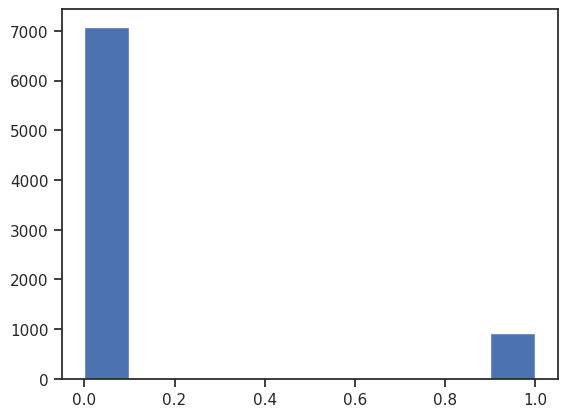

In [16]:
# plot data asli
plt.hist(df['is_safe'])
plt.show()

# **SMOTE**

In [17]:
# melakukan oversampling menggunakan smote agar data seimbang
from imblearn.over_sampling import SMOTE,RandomOverSampler, SMOTENC, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN,SMOTETomek

oversample = SMOTE(k_neighbors=3, random_state=100)
#Melakukan oversampling data training saja
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

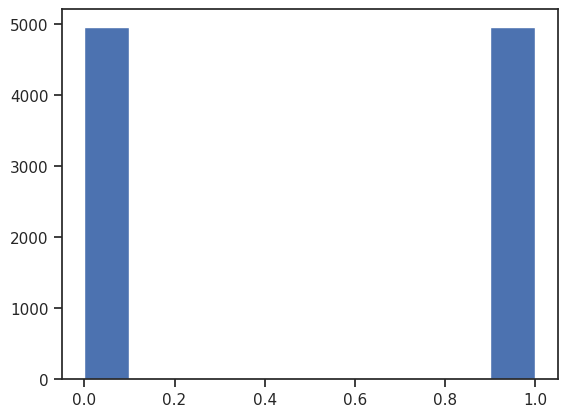

In [18]:
# plot setelah dilakukan oversampling
X_smote = pd.DataFrame(X_smote, columns = X.columns)
y_smote = pd.DataFrame(y_smote)


df_balanced = pd.concat([X_smote, y_smote], axis=1)
df_balanced.head

plt.hist(df_balanced['is_safe'])
plt.show()
y_smote = y_smote.values.ravel()

# **HPO SETIAP MODEL**

# **FADLI**

In [ ]:
# defining parameter range

from sklearn.ensemble import RandomForestClassifier
param_grid = [
    #  {'weights':['uniform','distance'], 'n_neighbors':[3,5,7,9,11,13,15], 'metric':['euclidean','manhattan','minkowski'], 'leaf_size' :[10, 30, 50]}
    #{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    #{'C': [1, 10], 'gamma': [0.01, 0.001], 'kernel': ['rbf']},
    # {'n_estimators': [50, 100, 150, 200], 'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    # {'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1, 10, 20], 'min_samples_leaf':[0.1, 0.5, 5, 10]}
    #{'n_estimators': [50, 100, 150, 200],'learning_rate': [0.1,0.2,0.3],}
    {'hidden_layer_sizes':[(50),(10,10,10),(30,30,30)], 'max_iter':[10000], 'activation': ['relu','tanh','logistic','identity'], 'solver': ['sgd'], 'learning_rate': ['adaptive'],'learning_rate_init': [0.001], 'alpha': [00.01],'early_stopping': [True, False],'validation_fraction': [0.1] }
 ]

#tolong perhatikan parameter scoring dan cv
classifier = RandomizedSearchCV(MLPClassifier(), param_grid, scoring='recall_macro', cv=10, refit = True, verbose = 3)

# fitting the model for grid search
classifier.fit(X_smote, y_smote)

# print best parameter after tuning
print('parameter terbaik:',classifier.best_params_)

# print how our model looks after hyper-parameter tuning
print(classifier.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END activation=identity, alpha=0.01, early_stopping=True, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.001, max_iter=10000, solver=sgd, validation_fraction=0.1;, score=0.770 total time=   2.0s
[CV 2/10] END activation=identity, alpha=0.01, early_stopping=True, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.001, max_iter=10000, solver=sgd, validation_fraction=0.1;, score=0.795 total time=   2.5s
[CV 3/10] END activation=identity, alpha=0.01, early_stopping=True, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.001, max_iter=10000, solver=sgd, validation_fraction=0.1;, score=0.800 total time=   1.8s
[CV 4/10] END activation=identity, alpha=0.01, early_stopping=True, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.001, max_iter=10000, solver=sgd, validation_fraction=0.1;, score=0.775 total time= 

In [ ]:
predictions = classifier.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      2120
         1.0       0.67      0.69      0.68       279

    accuracy                           0.92      2399
   macro avg       0.82      0.82      0.82      2399
weighted avg       0.93      0.92      0.92      2399



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


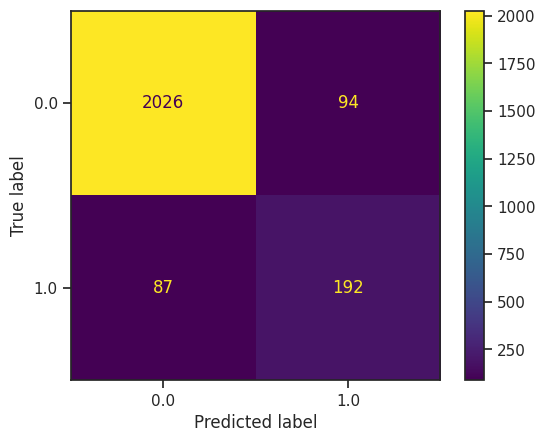

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
disp.plot()

# MUMTAZ


In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = [
    #  {'weights':['uniform','distance'], 'n_neighbors':[3,5,7,9,11,13,15], 'metric':['euclidean','manhattan','minkowski'], 'leaf_size' :[10, 30, 50]}
    #{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    #{'C': [1, 10], 'gamma': [0.01, 0.001], 'kernel': ['rbf']},
    {'n_estimators': [50, 100, 150, 200], 'criterion':['gini', 'entropy'], 'max_depth':[None, 5, 10, 15], 'min_samples_split':[2, 5, 10], 'min_samples_leaf':[1, 2, 4], 'max_features':['sqrt', 'log2']},
    # {'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1, 10, 20], 'min_samples_leaf':[0.1, 0.5, 5, 10]}
    # {'n_estimators': [50, 100, 150, 200],'learning_rate': [0.1,0.2,0.3],}
    # {'hidden_layer_sizes':[(50),(10,10,10),(30,30,30)], 'max_iter':[10000], 'activation': ['relu','tanh','logistic','identity'], 'solver': ['sgd'], 'learning_rate': ['adaptive'],'learning_rate_init': [0.001], 'alpha': [00.01],'early_stopping': [True, False],'validation_fraction': [0.1] }
 ]

classifier = RandomizedSearchCV(RandomForestClassifier(), param_grid, scoring='recall_macro', cv=10, refit = True, verbose = 3)

classifier.fit(X_smote, y_smote)

# print best parameter after tuning
print('parameter terbaik:',classifier.best_params_)

# print how our model looks after hyper-parameter tuning
print("Model terbaik:", classifier.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.950 total time=   1.5s
[CV 2/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.966 total time=   1.4s
[CV 3/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.980 total time=   1.8s
[CV 4/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.987 total time=   2.1s
[CV 5/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.974 total time=   1.4s
[CV 6/10] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.975 total time=   1.4s
[

In [ ]:
predictions = classifier.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2120
         1.0       0.83      0.81      0.82       279

    accuracy                           0.96      2399
   macro avg       0.90      0.90      0.90      2399
weighted avg       0.96      0.96      0.96      2399



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


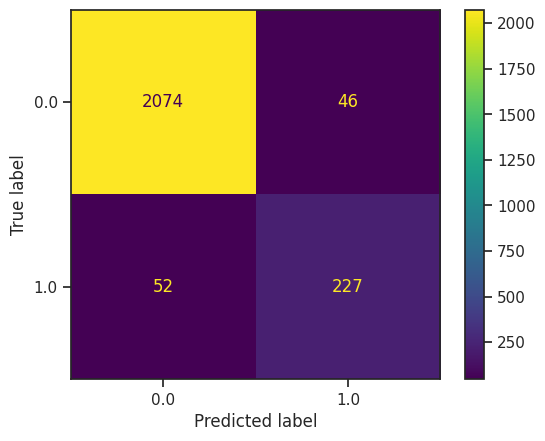

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
disp.plot()

# **BAGAS**

In [ ]:
# Decission Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# defining parameter range
param_grid = [
    # {'weights':['uniform','distance'], 'n_neighbors':[3,5,7,9,11,13,15], 'metric':['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean']}
    # {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    # {'C': [1, 10], 'gamma': [0.01, 0.001], 'kernel': ['rbf']},
    #{'n_estimators': [50, 100, 150, 200], 'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    {'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 2, 10, 20], 'min_samples_leaf':[0.1, 0.5, 5, 10]}
    #{'n_estimators': [50, 100, 150, 200],'learning_rate': [0.1,0.2,0.3],}
    # {'hidden_layer_sizes':[(10,10,10),(150,100,50)], 'max_iter':[5000,5000], 'activation': ['relu','tanh','logistic'], 'solver': ['adam']}
 ]

# Definisi GridSearchCV
classifier = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1', cv=5, refit=True, verbose=3)

# Fitting model ke data training
classifier.fit(X_smote, y_smote)

# Output parameter terbaik dan estimator terbaik
print('Parameter terbaik:', classifier.best_params_)
print('Model terbaik setelah tuning:', classifier.best_estimator_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.768 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.796 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.815 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.806 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.821 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=2;, score=0.768 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=2;, score=0.796 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=2;, score=0.815 total time=

In [ ]:
# print classification report
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      2120
         1.0       0.75      0.86      0.80       279

    accuracy                           0.95      2399
   macro avg       0.87      0.91      0.89      2399
weighted avg       0.95      0.95      0.95      2399



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


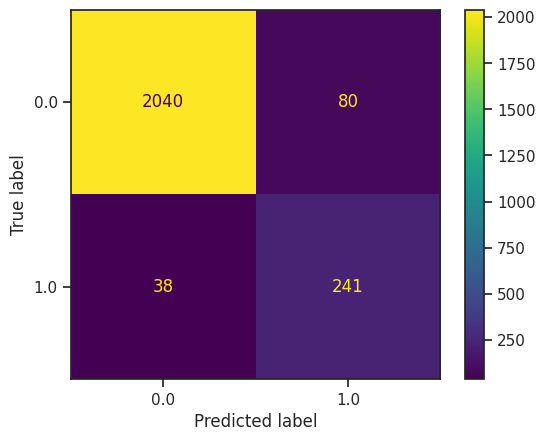

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
disp.plot()

#**aziz**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid untuk KNN
param_grid = [
    {
        'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski','chebyshev','cosine','jaccard'],
        'leaf_size': [10, 30, 50]
    }
]

# Ganti RandomForestClassifier dengan KNeighborsClassifier
classifier = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_grid,
    scoring='recall_macro',
    cv=10,
    refit=True,
    verbose=3
)

# Melatih model dengan data SMOTE
classifier.fit(X_smote, y_smote)

# Print parameter terbaik setelah tuning
print('Parameter terbaik:', classifier.best_params_)

# Print model terbaik setelah hyper-parameter tuning
print("Model terbaik:", classifier.best_estimator_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END leaf_size=50, metric=euclidean, n_neighbors=3, weights=distance;, score=0.894 total time=   0.1s
[CV 2/10] END leaf_size=50, metric=euclidean, n_neighbors=3, weights=distance;, score=0.905 total time=   0.1s
[CV 3/10] END leaf_size=50, metric=euclidean, n_neighbors=3, weights=distance;, score=0.912 total time=   0.1s
[CV 4/10] END leaf_size=50, metric=euclidean, n_neighbors=3, weights=distance;, score=0.914 total time=   0.0s
[CV 5/10] END leaf_size=50, metric=euclidean, n_neighbors=3, weights=distance;, score=0.891 total time=   0.0s
[CV 6/10] END leaf_size=50, metric=euclidean, n_neighbors=3, weights=distance;, score=0.905 total time=   0.1s
[CV 7/10] END leaf_size=50, metric=euclidean, n_neighbors=3, weights=distance;, score=0.903 total time=   0.0s
[CV 8/10] END leaf_size=50, metric=euclidean, n_neighbors=3, weights=distance;, score=0.904 total time=   0.0s
[CV 9/10] END leaf_size=50, metric=euclidean, n_n

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/10] END leaf_size=50, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.508 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/10] END leaf_size=50, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.578 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/10] END leaf_size=50, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.594 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/10] END leaf_size=50, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.614 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 5/10] END leaf_size=50, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.599 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 6/10] END leaf_size=50, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.594 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 7/10] END leaf_size=50, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.590 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 8/10] END leaf_size=50, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.586 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 9/10] END leaf_size=50, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.593 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 10/10] END leaf_size=50, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.578 total time=   0.7s
[CV 1/10] END leaf_size=50, metric=minkowski, n_neighbors=3, weights=distance;, score=0.894 total time=   0.0s
[CV 2/10] END leaf_size=50, metric=minkowski, n_neighbors=3, weights=distance;, score=0.905 total time=   0.0s
[CV 3/10] END leaf_size=50, metric=minkowski, n_neighbors=3, weights=distance;, score=0.912 total time=   0.0s
[CV 4/10] END leaf_size=50, metric=minkowski, n_neighbors=3, weights=distance;, score=0.914 total time=   0.0s
[CV 5/10] END leaf_size=50, metric=minkowski, n_neighbors=3, weights=distance;, score=0.891 total time=   0.0s
[CV 6/10] END leaf_size=50, metric=minkowski, n_neighbors=3, weights=distance;, score=0.905 total time=   0.0s
[CV 7/10] END leaf_size=50, metric=minkowski, n_neighbors=3, weights=distance;, score=0.903 total time=   0.0s
[CV 8/10] END leaf_size=50, metric=minkowski, n_neighbors=3, weights=distance;, score=0.904 total time=   0.0s
[C

In [ ]:
predictions = classifier.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.94      0.82      0.88      2120
         1.0       0.31      0.63      0.42       279

    accuracy                           0.79      2399
   macro avg       0.63      0.72      0.65      2399
weighted avg       0.87      0.79      0.82      2399



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


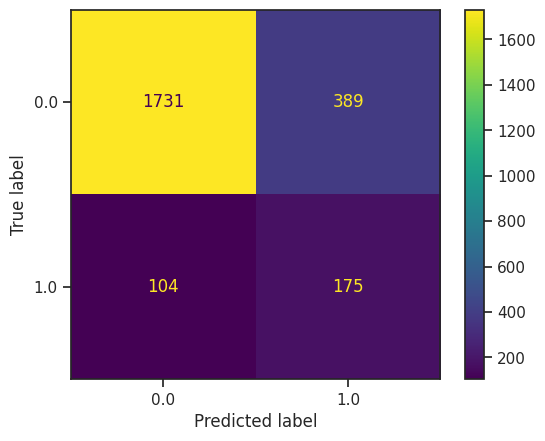

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
disp.plot()


# **Surya**

In [ ]:
# Decission Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# defining parameter range
# Decission Tree Classifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
# defining parameter range
param_grid = {
    # {'weights':['uniform','distance'], 'n_neighbors':[3,5,7,9,11,13,15], 'metric':['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean']}
    'C': [1, 10, 100, 1000],
    'gamma': [0.01, 0.001, 0.0001,0.00001],
    'kernel': ['rbf']
    #{'n_estimators': [50, 100, 150, 200], 'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    # {'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 2, 10, 20], 'min_samples_leaf':[0.1, 0.5, 5, 10]}
    #{'n_estimators': [50, 100, 150, 200],'learning_rate': [0.1,0.2,0.3],}
    # {'hidden_layer_sizes':[(10,10,10),(150,100,50)], 'max_iter':[5000,5000], 'activation': ['relu','tanh','logistic'], 'solver': ['adam']}
}

# Definisi GridSearchCV
classifier = GridSearchCV(SVC(), param_grid, scoring='f1_macro', cv=5, refit=True, verbose=3)

# Fitting model ke data training
classifier.fit(X_smote, y_smote)


# Output parameter terbaik dan estimator terbaik
print('Parameter terbaik:', classifier.best_params_)
print('Model terbaik setelah tuning:', classifier.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.976 total time=   4.1s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.986 total time=   3.8s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.980 total time=   4.9s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.982 total time=   3.8s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.983 total time=   4.4s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.930 total time=   1.4s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.948 total time=   1.9s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.954 total time=   1.5s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.951 total time=   1.2s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.946 total time=   1.2s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.826 total time=   1.9s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;

In [ ]:
predictions = classifier.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2120
         1.0       0.40      0.14      0.21       279

    accuracy                           0.88      2399
   macro avg       0.65      0.56      0.57      2399
weighted avg       0.84      0.88      0.85      2399



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


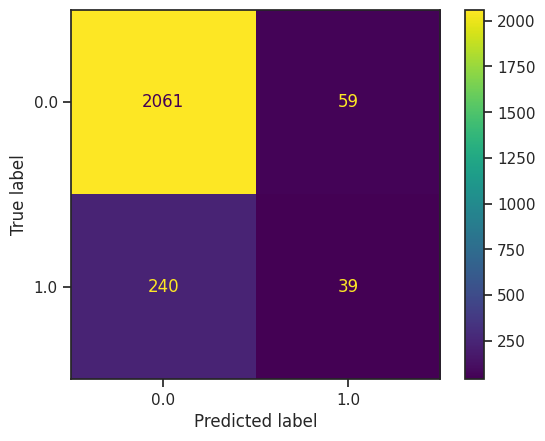

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
disp.plot()


In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid= {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.001, 0.01, 0.1]
}




# Inisialisasi model XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss') # tambahkan parameter ini untuk menghindari warning

# Definisi RandomizedSearchCV
classifier = RandomizedSearchCV(
    # model,
    XGBClassifier(),
    param_grid,
    scoring='recall_macro', # Sesuaikan scoring metric jika diperlukan
    cv=10, # Jumlah cross-validation folds
    refit=True,
    verbose=3,
    n_iter=50 # Jumlah kombinasi parameter yang akan diuji, sesuaikan sesuai kebutuhan dan waktu komputasi
)

# Fitting model ke data training yang sudah di-SMOTE
classifier.fit(X_smote, y_smote)

# Output parameter terbaik
print('Parameter terbaik untuk XGBoost:', classifier.best_params_)

# Output model terbaik
print("Model XGBoost terbaik setelah tuning:", classifier.best_estimator_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.01, subsample=0.8;, score=0.943 total time=   1.5s
[CV 2/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.01, subsample=0.8;, score=0.976 total time=   0.6s
[CV 3/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.01, subsample=0.8;, score=0.989 total time=   0.6s
[CV 4/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.01, subsample=0.8;, score=0.991 total time=   0.5s
[CV 5/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.01, subsample=0.8;, score=0.985 total time=   0.6s
[CV 6/10] END colsample_bytree=1.0, g

In [20]:
predictions = classifier.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      2120
         1.0       0.85      0.80      0.83       279

    accuracy                           0.96      2399
   macro avg       0.91      0.89      0.90      2399
weighted avg       0.96      0.96      0.96      2399



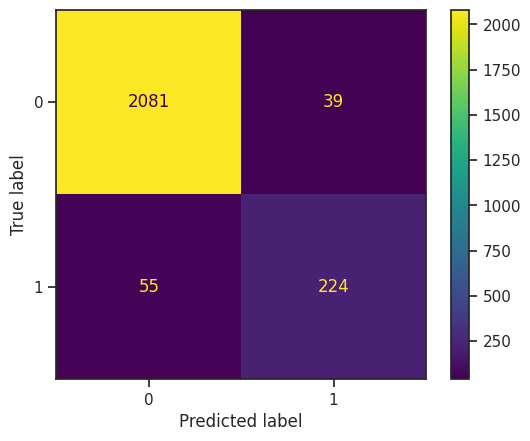

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
disp.plot()


In [1]:
%pip freeze

absl-py==1.4.0
accelerate==1.7.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.6.2.0.38.23
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.5.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.3.4
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.4.26
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.89
clarabel==0.11.0
click==8.2.1
cloudpathlib==0.21.1
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy